In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Kaggle/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Kaggle
creditcard.csv  kaggle.json       test_twitter.csv
heart.csv       o2Saturation.csv  train_twitter.csv


In [5]:
df_train=pd.read_csv("train_twitter.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Исследуем на сбалансированность

In [7]:
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Данные несбалансированные

Подготовка данных для тренировки

In [6]:
X_train,X_test,y_train,y_test=train_test_split(df_train['tweet'],df_train['label'],test_size=0.2,shuffle=True,stratify=df_train['label'],random_state=1230)

In [9]:
X_train.shape,X_test.shape

((25569,), (6393,))

In [ ]:
print(y_train.value_counts())
print()
print(y_train.value_counts(normalize=True))

0    23775
1     1794
Name: label, dtype: int64

0    0.929837
1    0.070163
Name: label, dtype: float64


In [ ]:
print(y_test.value_counts())
print()
print(y_test.value_counts(normalize=True))

0    5945
1     448
Name: label, dtype: int64

0    0.929923
1    0.070077
Name: label, dtype: float64


In [7]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

Как видно данные разделились пропорционально

Определение стоп слов

In [9]:
!pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

Решение задач с помощью logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tv=TfidfVectorizer(stop_words=stopWords[:25])
tv=tv.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
X_train_tf_idf = tv.transform(X_train)
X_test_tf_idf = tv.transform(X_test)

In [ ]:
clf=LogisticRegression()
clf=clf.fit(X_train_tf_idf,y_train)

In [ ]:
y_hat=clf.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.94      0.27      0.42       448

    accuracy                           0.95      6393
   macro avg       0.94      0.64      0.70      6393
weighted avg       0.95      0.95      0.93      6393



Logistic regression показала большой macro avg

Решение с помощью Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB

Решение с помощью MultinomialNB без настройки параметров

In [ ]:
tv=TfidfVectorizer(stop_words=stopWords[:25])
tv=tv.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
X_train_tf_idf = tv.transform(X_train)
X_test_tf_idf = tv.transform(X_test)

In [ ]:
mnb=MultinomialNB()
mnb=mnb.fit(X_train_tf_idf,y_train)

In [ ]:
y_hat=mnb.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       1.00      0.10      0.18       448

    accuracy                           0.94      6393
   macro avg       0.97      0.55      0.57      6393
weighted avg       0.94      0.94      0.91      6393



MultinomialNB macro avg ниже на 13% по сравнению  с logistic regression

Решение с помощью MultinomialNB с настройкой параметров

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [ ]:
nb_pipe=Pipeline(steps=[("tfi",TfidfVectorizer(stop_words=stopWords[:25])),("mnb",MultinomialNB())])
params={
    "tfi__ngram_range":[(1,1),(1,2),(1,3)],
    "mnb__alpha":[1,2,3]
}
gs_nmb=GridSearchCV(nb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_nmb=gs_nmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
gs_nmb.best_params_

{'mnb__alpha': 1, 'tfi__ngram_range': (1, 1)}

In [ ]:
y_hat=gs_nmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       1.00      0.11      0.20       448

    accuracy                           0.94      6393
   macro avg       0.97      0.55      0.58      6393
weighted avg       0.94      0.94      0.91      6393



С помощью перебора параметров macro avg у MultinomialNB вырос только на 1% по сравнение с тем же алгоритмом но без перебора параметров

Решение с помощью ComplementNB с настройкой параметров

In [ ]:
cnb_pipe=Pipeline(steps=[('tfidf',TfidfVectorizer(stop_words=stopWords[:25])),('cnb',ComplementNB())])
params={
    "tfidf__ngram_range":[(1,1),(1,2),(1,3)],
    "cnb__alpha":np.linspace(0,1,2,3,4)
}
gs_cmb=GridSearchCV(cnb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_cmb=gs_cmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 691, in fit
    alpha = self._check_alpha()
  File "/usr/local/lib/python3.7/dist-packages/skl

In [ ]:
gs_nmb.best_params_

{'mnb__alpha': 1, 'tfi__ngram_range': (1, 1)}

In [ ]:
y_hat=gs_nmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       1.00      0.11      0.20       448

    accuracy                           0.94      6393
   macro avg       0.97      0.55      0.58      6393
weighted avg       0.94      0.94      0.91      6393



ComplementNB и MultinomialNB показали одинаковый macro-avg, что странно, потому что ComplementNB должен справлятся с небелансированными данными

Решение с помощью BernulliNB с настройкой параметров

In [ ]:
nb_pipe=Pipeline(steps=[("tfi",TfidfVectorizer(stop_words=stopWords[:25])),("bnb",BernoulliNB())])
params={
    "tfi__ngram_range":[(1,1),(1,2),(1,3)],
    "bnb__alpha":[0,1,2,3,4]
}
gs_bmb=GridSearchCV(nb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_bmb=gs_bmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
gs_bmb.best_params_

{'bnb__alpha': 0, 'tfi__ngram_range': (1, 2)}

In [ ]:
y_hat=gs_bmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5945
           1       0.89      0.55      0.68       448

    accuracy                           0.96      6393
   macro avg       0.93      0.77      0.83      6393
weighted avg       0.96      0.96      0.96      6393



Вывод

Алгоритм Bernoulli показал себя лучше всех, у него macro avg выше чем у compliment и multinomial на 25%. Возможно это из-за того что проблему можно описать как модель бернулли, то есть у нас цель представлена в виде двух значений 0 и 1.

Данные несбалансированные, поэтому можно преминить стратегии over-sampling и under-sampling.

Adasyn

In [24]:
from imblearn.over_sampling import ADASYN

In [ ]:
tv=TfidfVectorizer(stop_words=stopWords[:25])
tv=tv.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
X_train_tf_idf = tv.transform(X_train)
X_test_tf_idf = tv.transform(X_test)

In [ ]:
sum(y_train),len(y_train)- sum(y_train)

(1794, 23775)

In [ ]:
ad=ADASYN()
X_train_tf_idf_adasyn,y_train_adasyn=ad.fit_resample(X_train_tf_idf,y_train)

In [ ]:
sum(y_train_adasyn),len(y_train_adasyn)- sum(y_train_adasyn)

(23758, 23775)

Мультиномиальный байес без настройки параметров

In [ ]:
mnb=MultinomialNB()
mnb=mnb.fit(X_train_tf_idf_adasyn,y_train_adasyn)

In [ ]:
y_hat=mnb.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      5945
           1       0.41      0.90      0.57       448

    accuracy                           0.90      6393
   macro avg       0.70      0.90      0.76      6393
weighted avg       0.95      0.90      0.92      6393



После применения к данным ADASYN macro avg вырасло на 18% по сравнению с тем же самым алгоритмом, но без ADASYN

ComplementNB без настройки параметров

In [ ]:
cnb=ComplementNB()
cnb=cnb.fit(X_train_tf_idf_adasyn,y_train_adasyn)

In [ ]:
y_hat=cnb.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      5945
           1       0.41      0.90      0.57       448

    accuracy                           0.90      6393
   macro avg       0.70      0.90      0.76      6393
weighted avg       0.95      0.90      0.92      6393



После применения к данным ADASYN macro avg вырасло на 18% по сравнению с тем же самым алгоритмом, но без ADASYN

BernoulliNB без настройки параметров

In [ ]:
tv_for_bernulli=TfidfVectorizer(stop_words=stopWords[:25],ngram_range=(1,2))
tv_for_bernulli=tv_for_bernulli.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
X_train_tf_idf_bern = tv_for_bernulli.transform(X_train)
X_test_tf_idf_bern = tv_for_bernulli.transform(X_test)

In [ ]:
ad=ADASYN()
X_train_tf_idf_adasyn_bern,y_train_adasyn_bern=ad.fit_resample(X_train_tf_idf_bern,y_train)

In [ ]:
bnb=BernoulliNB()
bnb=bnb.fit(X_train_tf_idf_adasyn_bern,y_train_adasyn_bern)

In [ ]:
y_hat=bnb.predict(X_test_tf_idf_bern)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.91      0.50      0.64       448

    accuracy                           0.96      6393
   macro avg       0.94      0.75      0.81      6393
weighted avg       0.96      0.96      0.96      6393



После применения к данным ADASYN macro avg упало на 2% по сравнению с тем же самым алгоритмом, но без ADASYN

LogisticRegression без настройки параметров

In [ ]:
clf=LogisticRegression()
clf=clf.fit(X_train_tf_idf_adasyn,y_train_adasyn)

In [ ]:
y_hat=clf.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5945
           1       0.59      0.77      0.67       448

    accuracy                           0.95      6393
   macro avg       0.79      0.87      0.82      6393
weighted avg       0.96      0.95      0.95      6393



После применения к данным ADASYN macro avg вырасло на 12% по сравнению с тем же самым алгоритмом, но без ADASYN

SVM без настройки параметров

In [ ]:
clf=SVC(kernel='poly',degree=2)
clf=clf.fit(X_train_tf_idf_adasyn,y_train_adasyn)

In [ ]:
y_hat=clf.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.90      0.50      0.64       448

    accuracy                           0.96      6393
   macro avg       0.93      0.75      0.81      6393
weighted avg       0.96      0.96      0.96      6393



SVM после применения к данным показал хорошие резкльтаты, macro avg на 1% меньше чем у logistic regression

<p><h3>Вывод</h3></p>
После применения к данным ADASYN результаты каждого алгоритма улучшились занчительно, за исключением Bernoulli

Tomeklinks

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tv=TfidfVectorizer(stop_words=stopWords[:25])
tv=tv.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
X_train_tf_idf = tv.transform(X_train)
X_test_tf_idf = tv.transform(X_test)

In [ ]:
tl=TomekLinks(sampling_strategy="all")

In [ ]:
sum(y_train),len(y_train)- sum(y_train)

(1794, 23775)

In [ ]:
X_train_tf_idf_augm_tl,y_train_augm_tl = tl.fit_resample(X_train_tf_idf,y_train)

In [ ]:
sum(y_train_augm_tl),len(y_train_augm_tl)- sum(y_train_augm_tl)

(1776, 23757)

MultinomialNB без настройки параметров

In [ ]:
mnb=MultinomialNB()
mnb=mnb.fit(X_train_tf_idf_augm_tl,y_train_augm_tl)

In [ ]:
y_hat=mnb.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       1.00      0.10      0.18       448

    accuracy                           0.94      6393
   macro avg       0.97      0.55      0.57      6393
weighted avg       0.94      0.94      0.91      6393



ComplementNB без настройки параметров

In [ ]:
cnb=ComplementNB()
cnb=cnb.fit(X_train_tf_idf_augm_tl,y_train_augm_tl)

In [ ]:
y_hat=cnb.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5945
           1       0.49      0.45      0.47       448

    accuracy                           0.93      6393
   macro avg       0.72      0.71      0.71      6393
weighted avg       0.93      0.93      0.93      6393



BernoulliNB без настройки параметров

In [ ]:
bnb=BernoulliNB()
bnb=bnb.fit(X_train_tf_idf_augm_tl,y_train_augm_tl)

In [ ]:
y_hat=bnb.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       0.97      0.13      0.22       448

    accuracy                           0.94      6393
   macro avg       0.95      0.56      0.60      6393
weighted avg       0.94      0.94      0.92      6393



LogisticRegression без настройки параметров

In [ ]:
clf=LogisticRegression()
clf=clf.fit(X_train_tf_idf_augm_tl,y_train_augm_tl)

In [ ]:
y_hat=clf.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.94      0.27      0.42       448

    accuracy                           0.95      6393
   macro avg       0.94      0.64      0.70      6393
weighted avg       0.95      0.95      0.93      6393



После применения алгорима TomekLinks результаты алгоритмов в средней упали или остались на таком же месте, но ComplementNB по macro avg вырос на 13%

Рассмотрим разные способы кодирования данных, в начале работы все алгоритмы работали на tfidf кодировке

Кодирование с помощью CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

Решение с помощью MultinomialNB с настройкой параметров

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [ ]:
nb_pipe=Pipeline(steps=[("cve",CountVectorizer(stop_words=stopWords[:25])),("mnb",MultinomialNB())])
params={
    "cve__ngram_range":[(1,1),(1,2),(1,3)],
    "mnb__alpha":[1,2,3]
}
gs_nmb=GridSearchCV(nb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_nmb=gs_nmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
gs_nmb.best_params_

{'cve__ngram_range': (1, 3), 'mnb__alpha': 1}

In [ ]:
y_hat=gs_nmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.99      0.40      0.57       448

    accuracy                           0.96      6393
   macro avg       0.98      0.70      0.77      6393
weighted avg       0.96      0.96      0.95      6393



По сравнению с MultinomialNB натретированном на tfidf, алгоритм натренированный на CountVectorizer показал результаты лучше. macro avg выше на 19%

Решение с помощью ComplementNB с настройкой параметров

In [ ]:
cnb_pipe=Pipeline(steps=[('cve',CountVectorizer(stop_words=stopWords[:25])),('cnb',ComplementNB())])
params={
    "cve__ngram_range":[(1,1),(1,2),(1,3)],
    "cnb__alpha":np.linspace(0,1,2,3,4)
}
gs_cmb=GridSearchCV(cnb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_cmb=gs_cmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 691, in fit
    alpha = self._check_alpha()
  File "/usr/local/lib/python3.7/dist-packages/skl

In [ ]:
gs_nmb.best_params_

{'cve__ngram_range': (1, 3), 'mnb__alpha': 1}

In [ ]:
y_hat=gs_nmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.99      0.40      0.57       448

    accuracy                           0.96      6393
   macro avg       0.98      0.70      0.77      6393
weighted avg       0.96      0.96      0.95      6393



По сравнению с ComplementNB натретированном на tfidf, алгоритм натренированный на CountVectorizer показал результаты лучше. macro avg выше на 19%

Решение с помощью BernoulliNB с настройкой параметров

In [ ]:
nb_pipe=Pipeline(steps=[("cve",CountVectorizer(stop_words=stopWords[:25])),("bnb",BernoulliNB())])
params={
    "cve__ngram_range":[(1,1),(1,2),(1,3)],
    "bnb__alpha":[0,1,2,3,4]
}
gs_bmb=GridSearchCV(nb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_bmb=gs_bmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
gs_bmb.best_params_

{'bnb__alpha': 0, 'cve__ngram_range': (1, 2)}

In [ ]:
y_hat=gs_bmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5945
           1       0.89      0.55      0.68       448

    accuracy                           0.96      6393
   macro avg       0.93      0.77      0.83      6393
weighted avg       0.96      0.96      0.96      6393



По сравнению с BernoulliNB натретированном на tfidf, алгоритм натренированный на CountVectorizer показал точно такие же

Logistic regression

In [ ]:
nb_pipe=Pipeline(steps=[("cve",CountVectorizer(stop_words=stopWords[:25])),("logreg",LogisticRegression())])
params={
    "cve__ngram_range":[(1,1),(1,2),(1,3)],
}
gs_bmb=GridSearchCV(nb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_bmb=gs_bmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
gs_bmb.best_params_

{'cve__ngram_range': (1, 2)}

In [ ]:
y_hat=gs_bmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5945
           1       0.90      0.52      0.66       448

    accuracy                           0.96      6393
   macro avg       0.93      0.76      0.82      6393
weighted avg       0.96      0.96      0.96      6393



На логичскю регрессию тип кодирования данных не повлиял

<p><h3>Вывод</h3></p>
После кодирования методом CountVectorizer результаты алгоритмов или значительно улучшились или остальись точно такими же

Кодирование методом bag of words

In [ ]:
nb_pipe=Pipeline(steps=[("cve",CountVectorizer(stop_words=stopWords[:25],binary=True)),("mnb",MultinomialNB())])
params={
    "cve__ngram_range":[(1,1),(1,2),(1,3)],
    "mnb__alpha":[1,2,3]
}
gs_nmb=GridSearchCV(nb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_nmb=gs_nmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
gs_nmb.best_params_

{'cve__ngram_range': (1, 3), 'mnb__alpha': 1}

In [ ]:
y_hat=gs_nmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.99      0.40      0.57       448

    accuracy                           0.96      6393
   macro avg       0.98      0.70      0.77      6393
weighted avg       0.96      0.96      0.95      6393



По сравнению с MultinomialNB натретированном на tfidf, алгоритм натренированный на bag of words показал результаты лучше. macro avg выше на 19%

Решение с помощью ComplementNB с настройкой параметров

In [ ]:
cnb_pipe=Pipeline(steps=[('cve',CountVectorizer(stop_words=stopWords[:25],binary=True)),('cnb',ComplementNB())])
params={
    "cve__ngram_range":[(1,1),(1,2),(1,3)],
    "cnb__alpha":np.linspace(0,1,2,3,4)
}
gs_cmb=GridSearchCV(cnb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_cmb=gs_cmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 691, in fit
    alpha = self._check_alpha()
  File "/usr/local/lib/python3.7/dist-packages/skl

In [ ]:
gs_nmb.best_params_

{'cve__ngram_range': (1, 3), 'mnb__alpha': 1}

In [ ]:
y_hat=gs_nmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5945
           1       0.99      0.40      0.57       448

    accuracy                           0.96      6393
   macro avg       0.98      0.70      0.77      6393
weighted avg       0.96      0.96      0.95      6393



По сравнению с ComplementNB натретированном на tfidf, алгоритм натренированный на bag of words показал результаты лучше. macro avg выше на 19%

Решение с помощью BernoulliNB с настройкой параметров

In [ ]:
nb_pipe=Pipeline(steps=[("cve",CountVectorizer(stop_words=stopWords[:25],binary=True)),("bnb",BernoulliNB())])
params={
    "cve__ngram_range":[(1,1),(1,2),(1,3)],
    "bnb__alpha":[0,1,2,3,4]
}
gs_bmb=GridSearchCV(nb_pipe,params,cv=5,n_jobs=-1)

In [ ]:
gs_bmb=gs_bmb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
gs_bmb.best_params_

{'bnb__alpha': 0, 'cve__ngram_range': (1, 2)}

In [ ]:
y_hat=gs_bmb.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5945
           1       0.89      0.55      0.68       448

    accuracy                           0.96      6393
   macro avg       0.93      0.77      0.83      6393
weighted avg       0.96      0.96      0.96      6393



По сравнению с BernoulliNB натретированном на tfidf, алгоритм натренированный на bag of words показал точно такие же

<p><h3>Вывод</h3></p>
После кодирования методом Bag of words результаты алгоритмов или значительно улучшились или остальись точно такими же

После проделанной работы я выяснил, что лучший прирост качества давали CountVectorize кодирование и ADASYN, объеденим их

In [31]:
tv=CountVectorizer(stop_words=stopWords[:25],ngram_range=(1,1))
tv=tv.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [32]:
X_train_tf_idf = tv.transform(X_train)
X_test_tf_idf = tv.transform(X_test)

In [33]:
sum(y_train),len(y_train)- sum(y_train)

(1794, 23775)

In [35]:
ad=ADASYN()
X_train_tf_idf_adasyn,y_train_adasyn=ad.fit_resample(X_train_tf_idf,y_train)

In [36]:
sum(y_train_adasyn),len(y_train_adasyn)- sum(y_train_adasyn)

(23862, 23775)

MultinomialNB

In [37]:
mnb=MultinomialNB()
mnb=mnb.fit(X_train_tf_idf_adasyn,y_train_adasyn)

In [38]:
y_hat=mnb.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5945
           1       0.42      0.76      0.54       448

    accuracy                           0.91      6393
   macro avg       0.70      0.84      0.74      6393
weighted avg       0.94      0.91      0.92      6393



MultinomialNB macro avg упало на 3%

ComplementNB

In [39]:
cnb=ComplementNB()
cnb=cnb.fit(X_train_tf_idf_adasyn,y_train_adasyn)

In [40]:
y_hat=cnb.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5945
           1       0.42      0.76      0.54       448

    accuracy                           0.91      6393
   macro avg       0.70      0.84      0.74      6393
weighted avg       0.94      0.91      0.92      6393



ComplementNB macro avg упало на 3%

BernoulliNB

In [51]:
tv_for_bernulli=CountVectorizer(stop_words=stopWords[:25],ngram_range=(1,1))
tv_for_bernulli=tv_for_bernulli.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [52]:
X_train_tf_idf_bern = tv_for_bernulli.transform(X_train)
X_test_tf_idf_bern = tv_for_bernulli.transform(X_test)

In [53]:
ad=ADASYN()
X_train_tf_idf_adasyn_bern,y_train_adasyn_bern=ad.fit_resample(X_train_tf_idf_bern,y_train)

In [54]:
bnb=BernoulliNB()
bnb=bnb.fit(X_train_tf_idf_adasyn_bern,y_train_adasyn_bern)

In [55]:
y_hat=bnb.predict(X_test_tf_idf_bern)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5945
           1       0.32      0.58      0.41       448

    accuracy                           0.88      6393
   macro avg       0.64      0.75      0.67      6393
weighted avg       0.92      0.88      0.90      6393



BernoulliNB macro avg упало на 17%

LogisticRegression

In [ ]:
tv=CountVectorizer(stop_words=stopWords[:25],ngram_range=(1,2))
tv=tv.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
X_train_tf_idf = tv.transform(X_train)
X_test_tf_idf = tv.transform(X_test)

In [ ]:
sum(y_train),len(y_train)- sum(y_train)

(1794, 23775)

In [ ]:
ad=ADASYN()
X_train_tf_idf_adasyn,y_train_adasyn=ad.fit_resample(X_train_tf_idf,y_train)

In [ ]:
clf=LogisticRegression()
clf=clf.fit(X_train_tf_idf_adasyn,y_train_adasyn)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_hat=clf.predict(X_test_tf_idf)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5945
           1       0.40      0.66      0.50       448

    accuracy                           0.91      6393
   macro avg       0.69      0.79      0.72      6393
weighted avg       0.93      0.91      0.92      6393



LogisticRegression macro avg упало на 17%

<p><h3>Вывод</h3></p>
Скрещивание ADASYN и CountVectorize не дало положительных результатов

Попробуем визуализировать закодированные предложения с помощью tfidf методами PCA и TSNE

In [95]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
tv=TfidfVectorizer(stop_words=stopWords[:25])
tv=tv.fit(df_train['tweet'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 're', 've'] not in stop_words.
  % sorted(inconsistent)


In [97]:
df_class_0=df_train[df_train['label']==0][:400]
df_class_1=df_train[df_train['label']==1][:400]

df_class_0_1=pd.concat([df_class_0,df_class_1])

x_vect_0_1 = tv.fit_transform(df_class_0_1['tweet'])

In [88]:
pca=PCA(3)

In [90]:
X_tf_idf_3=pca.fit_transform(x_vect_0_1.toarray())

In [82]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'PC3')

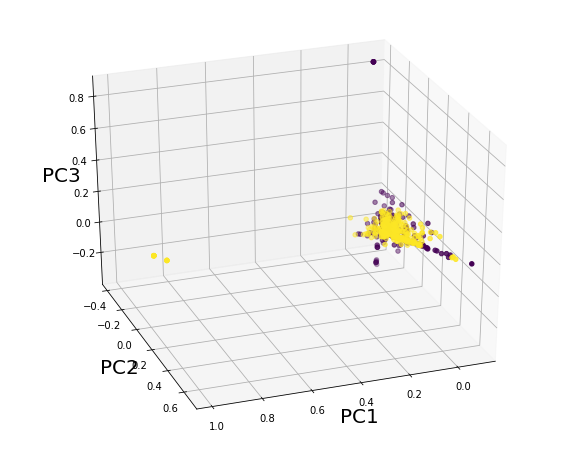

In [94]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 70)
ax.scatter(X_tf_idf_3.T[0], X_tf_idf_3.T[1], X_tf_idf_3.T[2], c=df_class_0_1['label'])
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

In [98]:
pca=PCA(2)

In [99]:
X_tf_idf_2=pca.fit_transform(x_vect_0_1.toarray())

In [100]:
import matplotlib.pyplot as plt

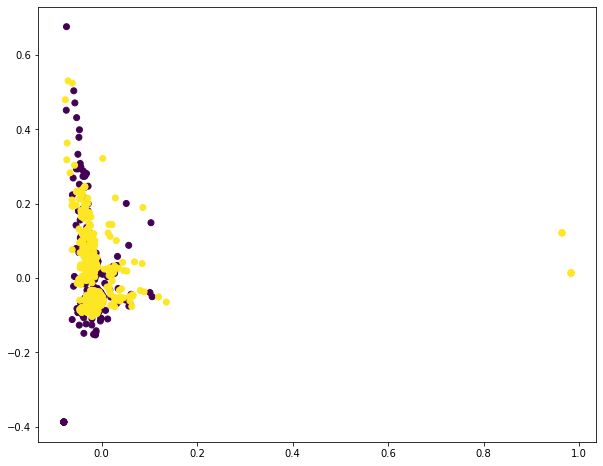

In [105]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_tf_idf_2.T[0], X_tf_idf_2.T[1], c=df_class_0_1['label'])

In [106]:
tsne=TSNE(2)

In [107]:
X_tf_idf_2=tsne.fit_transform(x_vect_0_1.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [108]:
import matplotlib.pyplot as plt

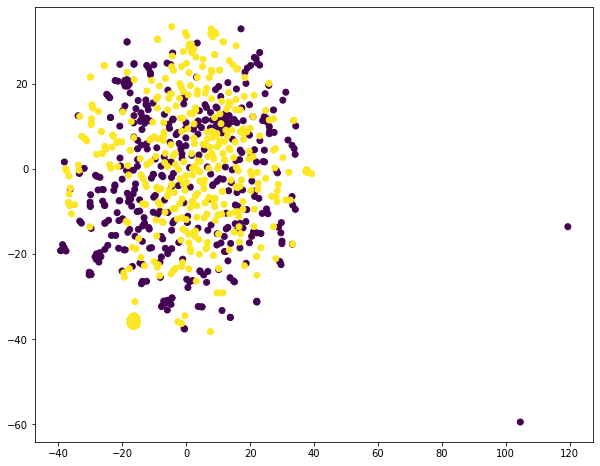

In [109]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_tf_idf_2.T[0], X_tf_idf_2.T[1], c=df_class_0_1['label'])

In [110]:
tsne=TSNE(3)

In [111]:
X_tf_idf_3=tsne.fit_transform(x_vect_0_1.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [112]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'PC3')

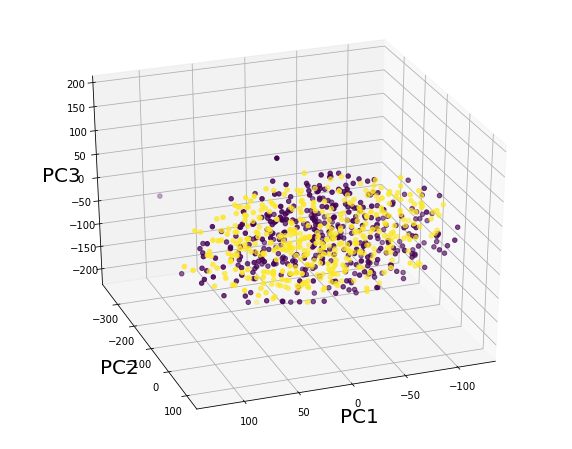

In [113]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 70)
ax.scatter(X_tf_idf_3.T[0], X_tf_idf_3.T[1], X_tf_idf_3.T[2], c=df_class_0_1['label'])
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

Как видно из кодировки, предложения плохо отображаются в 2d и в 3d c помощью tsne и pca

<p><h3>Вывод</h3></p>
<h4>После проделанной работы я могу сделать вывод, что алгоритмы показали неплохие macro avg, обычная логическая регрессия показала лучший результат. После применения ADASYN результаты алгоритмов выросли значительно, а TomekLinks только ухушил резуьтат. С помощью PCA и  TSNE не получилось отобразить предложения так как это было задумано: чтобы в одной стороне был один класс, а в другой другой. Так же на этих данных bag of words и CountVectorize показали наилучшие рзультаты.</h4>